In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlt
import numpy as np
import pandas as pd
from vega_datasets import data
import statsmodels.api as sm

In [0]:
unemplymnt_data = data.unemployment_across_industries()
unemplymnt_data.head()

,count,date,month,rate,series,year
0,430,2000-01-01 08:00:00,1,2.1,Government,2000
1,409,2000-02-01 08:00:00,2,2.0,Government,2000
2,311,2000-03-01 08:00:00,3,1.5,Government,2000
3,269,2000-04-01 08:00:00,4,1.3,Government,2000
4,370,2000-05-01 07:00:00,5,1.9,Government,2000


In [0]:
years = unemplymnt_data['year'].unique()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


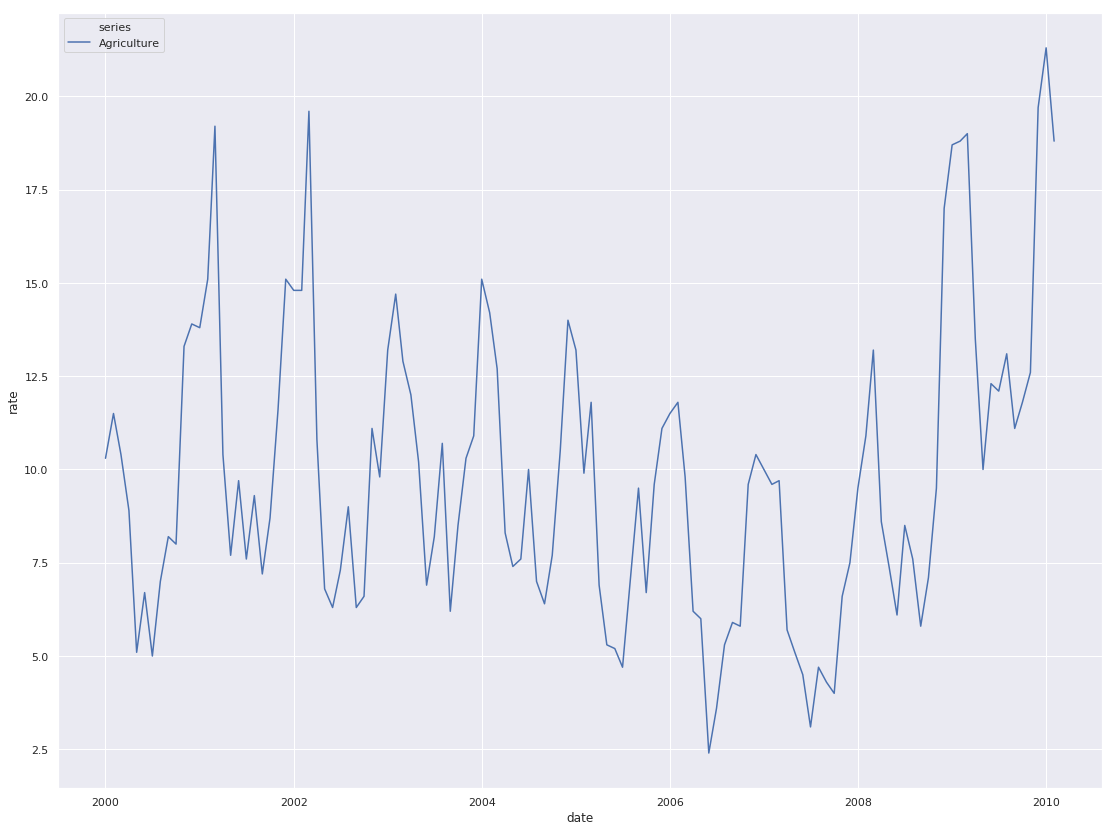

In [0]:
sns.set(rc={'figure.figsize':(18.7,14.27)})
sns.lineplot(x='date', y='rate', hue='series', data=unemplymnt_data.query("series == 'Agriculture'")) #data=[(unemplymnt_data["series"]!="Agriculture") & (unemplymnt_data["series"]!="Construction")]).query("region == 'frontal'")

In [0]:
agriculture = unemplymnt_data.loc[unemplymnt_data['series'] == 'Agriculture']
agriculture.head()

,count,date,month,rate,series,year
1464,154,2000-01-01 08:00:00,1,10.3,Agriculture,2000
1465,173,2000-02-01 08:00:00,2,11.5,Agriculture,2000
1466,152,2000-03-01 08:00:00,3,10.4,Agriculture,2000
1467,135,2000-04-01 08:00:00,4,8.9,Agriculture,2000
1468,73,2000-05-01 07:00:00,5,5.1,Agriculture,2000


In [0]:
agriculture = agriculture.set_index('date')
agriculture.index

DatetimeIndex(['2000-01-01 08:00:00', '2000-02-01 08:00:00',
               '2000-03-01 08:00:00', '2000-04-01 08:00:00',
               '2000-05-01 07:00:00', '2000-06-01 07:00:00',
               '2000-07-01 07:00:00', '2000-08-01 07:00:00',
               '2000-09-01 07:00:00', '2000-10-01 07:00:00',
               ...
               '2009-05-01 07:00:00', '2009-06-01 07:00:00',
               '2009-07-01 07:00:00', '2009-08-01 07:00:00',
               '2009-09-01 07:00:00', '2009-10-01 07:00:00',
               '2009-11-01 07:00:00', '2009-12-01 08:00:00',
               '2010-01-01 08:00:00', '2010-02-01 08:00:00'],
              dtype='datetime64[ns]', name='date', length=122, freq=None)

In [0]:
y = agriculture['rate'].resample('MS').mean()

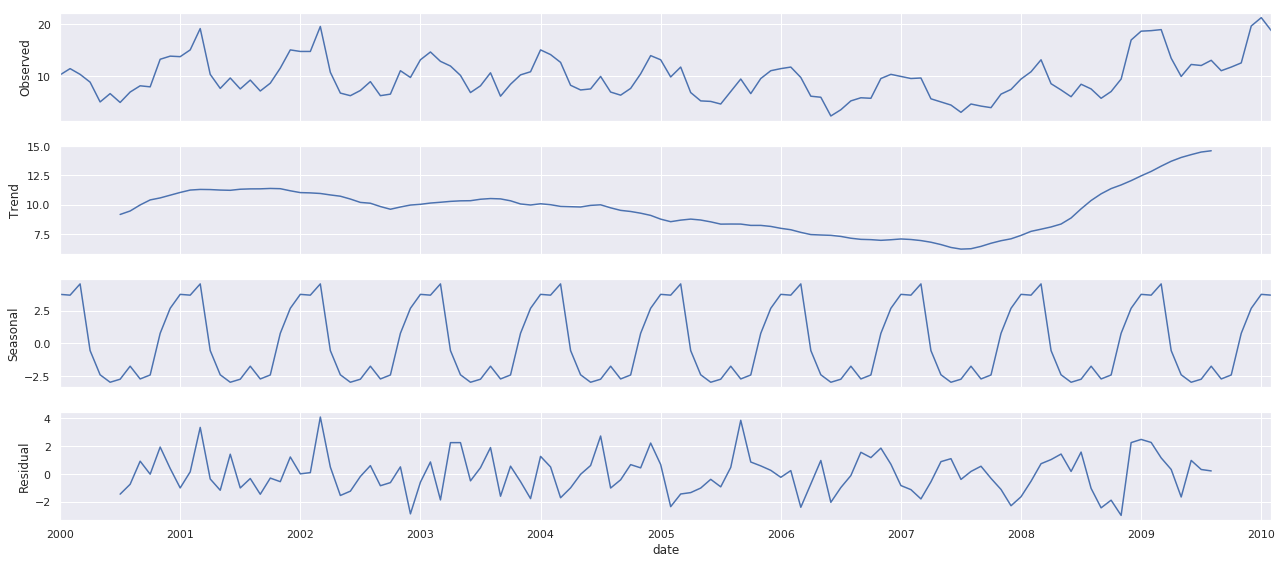

In [0]:
# Source: #https://www.kdnuggets.com/2018/09/end-to-end-project-time-series-analysis-forecasting-python.html
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [0]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] 

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [0]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:916.8244595006815
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:733.1857690706188
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:552.9006552704986
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:491.5830044236711
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:559.2560999606102
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:555.5471832173453
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:495.8990243113675
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:493.0233645552332
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:782.9237219703775
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:638.003098154332
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:512.0395135031508
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:448.49468079534574
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:523.8954631321087
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:512.1239016511671
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:459.1886272066166
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:450.49462162675
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:580.6221349104695
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:501.7599585185344
ARIMA(0, 1, 

In [0]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2277      0.133      1.713      0.087      -0.033       0.488
ma.L1         -0.7541      0.105     -7.188      0.000      -0.960      -0.548
ar.S.L12      -0.2861      0.127     -2.247      0.025      -0.536      -0.037
sigma2         4.4177      0.557      7.933      0.000       3.326       5.509


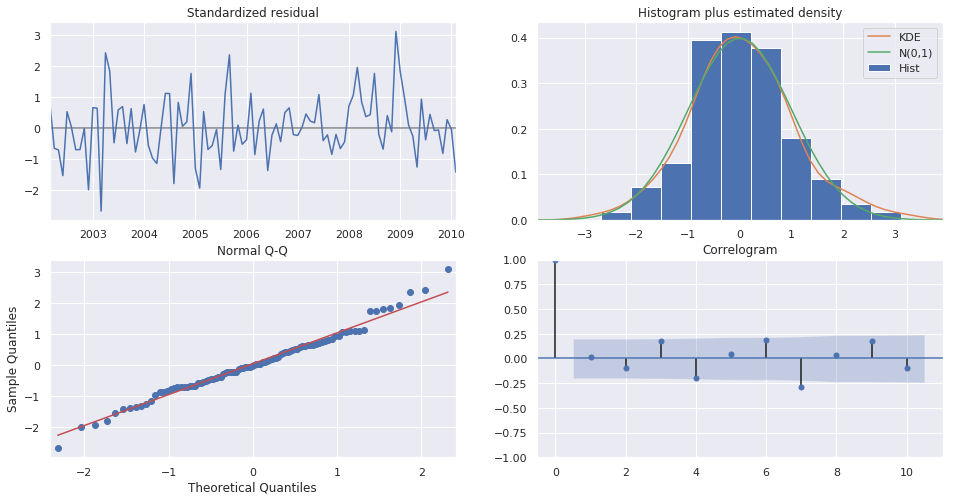

In [0]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

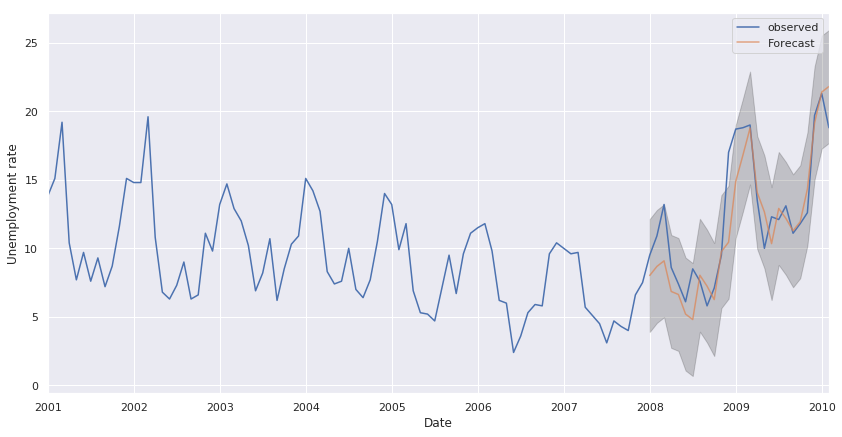

In [0]:
pred = results.get_prediction(start=pd.to_datetime('2008-01-01'), dynamic=False) ##https://www.kdnuggets.com/2018/09/end-to-end-project-time-series-analysis-forecasting-python.html
pred_ci = pred.conf_int()

ax = y['2001':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Unemployment rate')
plt.legend()

plt.show()

In [0]:
y_forecasted = pred.predicted_mean
y_truth = y['2008-01-01':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 5.08


In [0]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 2.25


In [0]:
agriculture = unemplymnt_data.loc[unemplymnt_data['series'] == 'Agriculture']
construction = unemplymnt_data.loc[unemplymnt_data['series'] == 'Construction']
manufacturing = unemplymnt_data.loc[unemplymnt_data['series'] == 'Manufacturing']
information = unemplymnt_data.loc[unemplymnt_data['series'] == 'Information']
finance = unemplymnt_data.loc[unemplymnt_data['series'] == 'Finance']
educhlth = unemplymnt_data.loc[unemplymnt_data['series'] == 'Education and Health' ]
wsrt = unemplymnt_data.loc[unemplymnt_data['series'] == 'Wholesale and Retail Trade']
leisure = unemplymnt_data.loc[unemplymnt_data['series'] == 'Leisure and hospitality']
business = unemplymnt_data.loc[unemplymnt_data['series'] == 'Business services']
agriculture.shape, construction.shape , business.shape

((122, 6), (122, 6), (122, 6))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1296x432 with 0 Axes>

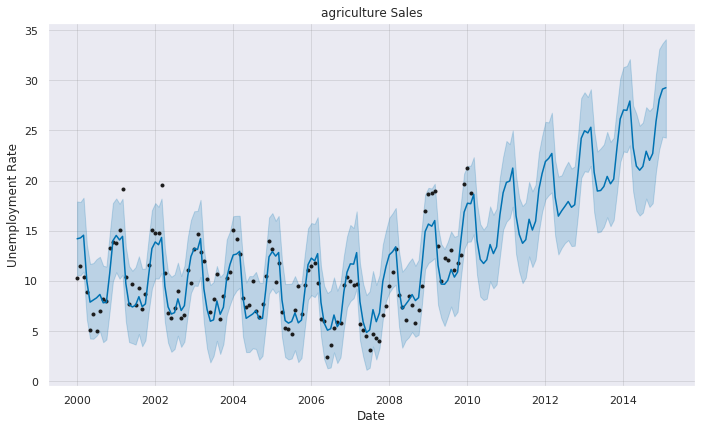

In [0]:
agriculture = agriculture.rename(columns={'date': 'ds', 'rate': 'y'})
agriculture_model = Prophet(interval_width=0.95)
agriculture_model.fit(agriculture)

educhlth = educhlth.rename(columns={'date': 'ds', 'rate': 'y'})
educhlth_model = Prophet(interval_width=0.95)
educhlth_model.fit(educhlth)

agriculture_forecast = agriculture_model.make_future_dataframe(periods=60, freq='MS')
agriculture_forecast = agriculture_model.predict(agriculture_forecast)

educhlth_forecast = educhlth_model.make_future_dataframe(periods=60, freq='MS')
educhlth_forecast = educhlth_model.predict(educhlth_forecast)

plt.figure(figsize=(18, 6))
agriculture_model.plot(agriculture_forecast, xlabel = 'Date', ylabel = 'Unemployment Rate')
plt.title('agriculture Sales');

In [0]:
educhlth.head()
#educhlth.y.notnull()
#print(educhlth.isnull().sum())
#Normalize Rotten tomato ratings and create a new average rating 
educhlth_forecast["trend1"] = (educhlth_forecast["trend"]).round(1)
educhlth_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,trend1,year1
0,2000-01-01 08:00:00,2.401997,1.806889,2.818267,2.401997,2.401997,-0.059014,-0.059014,-0.059014,-0.059014,-0.059014,-0.059014,0.0,0.0,0.0,2.342983,2.4,2000
1,2000-02-01 08:00:00,2.430819,1.646952,2.649057,2.430819,2.430819,-0.285876,-0.285876,-0.285876,-0.285876,-0.285876,-0.285876,0.0,0.0,0.0,2.144942,2.4,2000
2,2000-03-01 08:00:00,2.457781,1.871386,2.963670,2.457781,2.457781,-0.037851,-0.037851,-0.037851,-0.037851,-0.037851,-0.037851,0.0,0.0,0.0,2.419930,2.5,2000
3,2000-04-01 08:00:00,2.486602,1.570099,2.601481,2.486602,2.486602,-0.389446,-0.389446,-0.389446,-0.389446,-0.389446,-0.389446,0.0,0.0,0.0,2.097156,2.5,2000
4,2000-05-01 07:00:00,2.514455,1.836269,2.960864,2.514455,2.514455,-0.107703,-0.107703,-0.107703,-0.107703,-0.107703,-0.107703,0.0,0.0,0.0,2.406752,2.5,2000


<Figure size 1296x432 with 0 Axes>

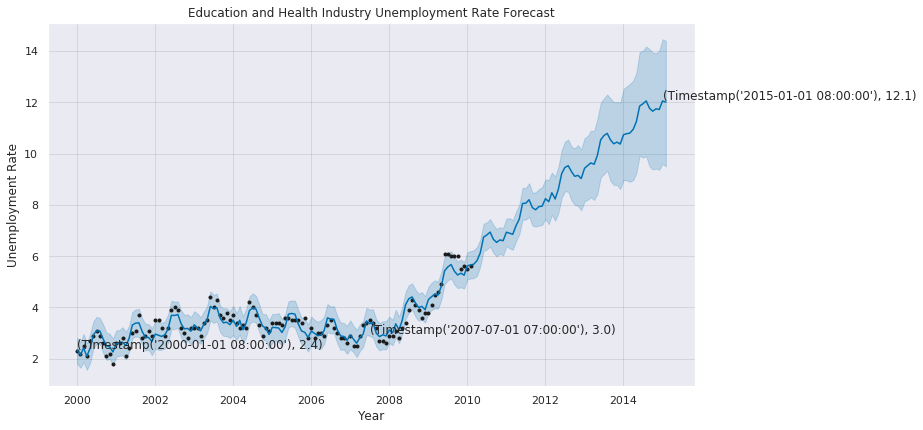

In [0]:
plt.figure(figsize=(18, 6))
educhlth_model.plot(educhlth_forecast, xlabel = 'Year', ylabel = 'Unemployment Rate')

# Annotate on plot for index, (value1, value2) in enumerate(zip(data1, data2)):
for i,(y1, r1) in enumerate(zip(educhlth_forecast.ds,educhlth_forecast.trend1)):
  if i%90==0:
     plt.annotate((y1,r1), (educhlth_forecast.ds[i], educhlth_forecast.trend1[i].round(1)))

plt.title('Education and Health Industry Unemployment Rate Forecast');